## Customer Segmentation | Clustering & PCA

### About dataset

Customer Segmentation Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

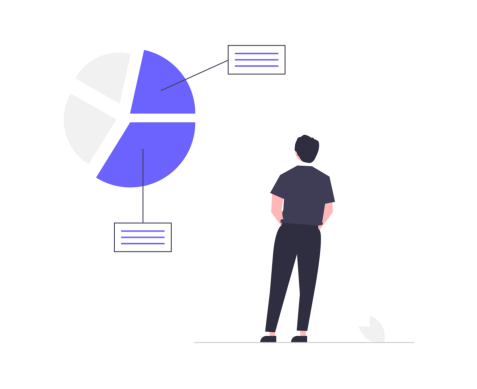

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/kaggle/input/segment/undraw_Segment_analysis_re_ocsl.png')

plt.imshow(img)
plt.axis('off')
plt.show()

Customer Segmentation helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Dataset source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

## Import our dataset and necesary libraries

In [2]:
pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 75.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.8.2 which is incompatible.
spaghetti 1.7.6 requires 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

from feature_engine.encoding import OrdinalEncoder
from feature_engine.outliers import OutlierTrimmer

from yellowbrick.cluster import KElbowVisualizer

In [4]:
# function to check missing & duplicated values
def check_data(df):
    print('-' *50)
    print(f'Dataset length: {len(df)}')
    missing_data = df.isnull().sum().sum()
    
    print(f'There are {missing_data} missing values in the dataset.')
    print(f'There are {df.duplicated().sum().sum()} duplicated values in the dataset.')
    print('-' *50)
    
    if missing_data > 0:
        print('Missing values:')
        print(df.isnull().sum().sort_values(ascending=False))
        print('-' *50)

In [5]:
df_cust = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
df_cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Handling missing values

In [6]:
check_data(df_cust)

--------------------------------------------------
Dataset length: 2240
There are 24 missing values in the dataset.
There are 0 duplicated values in the dataset.
--------------------------------------------------
Missing values:
Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64
----

Let's eliminate missing values ​​because the proportion of missing values ​​is very small

In [7]:
df_cust.dropna(inplace=True)
check_data(df_cust)

--------------------------------------------------
Dataset length: 2216
There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.
--------------------------------------------------


In [8]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

## Feature Extraction & Engineering

Let's take a look on the categorical features on our dataset

In [9]:
cat_cols = [var for var in df_cust.columns if df_cust[var].dtype == 'O']

# print value counts for each categorical column
for col in cat_cols:
    print(df_cust[col].value_counts())
    print('-'*50)

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
--------------------------------------------------
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
--------------------------------------------------
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: count, Length: 662, dtype: int64
--------------------------------------------------


From what we see, we can perform feature extraction, fix some columns to match the correct format, and perform feature engineering.

Adding `Age` & `EnrollmentDate` columns

In [10]:
df_cust['Age'] = datetime.now().year - df_cust['Year_Birth']
df_cust['EnrollmentDate'] = pd.to_datetime(df_cust['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)

# removing unnecessary columns
df_cust = df_cust.drop(['Year_Birth', 'Dt_Customer', 'ID'], axis=1)

Fixing `Education` & `Marital_Status` format

In [11]:
# based on google, 2n cycle is master degree
df_cust['Education'] = df_cust['Education'].replace({'2n Cycle': 'Master'})

# fixing Marital_Status format
df_cust['Marital_Status'] = df_cust['Marital_Status'].replace({
    'Married': 'In a Relationship',
    'Together': 'In a Relationship',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single',
})

people_per_household = df_cust['Marital_Status'].replace({
    'In a Relationship': 2,
    'Single': 1
})

Adding `Family_Size` column

In [12]:
df_cust['Family_Size'] = df_cust['Kidhome'] + df_cust['Teenhome'] + people_per_household

Let's take a look on our categorical columns again

In [13]:
cat_cols = [var for var in df_cust.columns if df_cust[var].dtype == 'O']
# print value coutns for each categorical column
for col in cat_cols:
    print(df_cust[col].value_counts())
    print('-'*50)

Education
Graduation    1116
Master         565
PhD            481
Basic           54
Name: count, dtype: int64
--------------------------------------------------
Marital_Status
In a Relationship    1430
Single                786
Name: count, dtype: int64
--------------------------------------------------


Much cleaner right? Let's do more feature extraction

Adding `Num_Total_Purchases`, `Num_Accepted_Cmp` & `Total_Amount_Spent` columns

In [14]:
purchases = ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
df_cust['Num_Total_Purchases'] = df_cust[purchases].sum(axis=1)

promotions = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df_cust['Num_Accepted_Cmp'] = df_cust[promotions].sum(axis=1)

mnt_products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_cust['Total_Amount_Spent'] = df_cust[mnt_products].sum(axis=1)

In [15]:
df_cust.sample(2, random_state=42)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,EnrollmentDate,Family_Size,Num_Total_Purchases,Num_Accepted_Cmp,Total_Amount_Spent
961,PhD,Single,52597.0,0,1,69,492,0,37,7,...,0,3,11,0,62,2014,2,17,0,578
229,PhD,In a Relationship,34320.0,1,0,66,4,1,9,3,...,0,3,11,0,38,2014,3,3,0,17


## Feature Encoding for categorical data

In [16]:
cat_cols = [var for var in df_cust.columns if df_cust[var].dtype == 'O']
cat_cols

['Education', 'Marital_Status']

In [17]:
for col in cat_cols:
    print(f'-'*50)
    print(df_cust[col].value_counts())
    print(f'-'*50)

--------------------------------------------------
Education
Graduation    1116
Master         565
PhD            481
Basic           54
Name: count, dtype: int64
--------------------------------------------------
--------------------------------------------------
Marital_Status
In a Relationship    1430
Single                786
Name: count, dtype: int64
--------------------------------------------------


For Feature Encoding, we're going to apply `Label Encoding` or `Arbitrary Encoding` on Feature-Engine library!

In [18]:
label_encoder = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_cols
)

label_encoder.fit(df_cust)

# Transform the data
df_cust = label_encoder.transform(df_cust)

## Outliers Handling

Let's take a look on outliers in our dataset based on numerical columns using histogram.

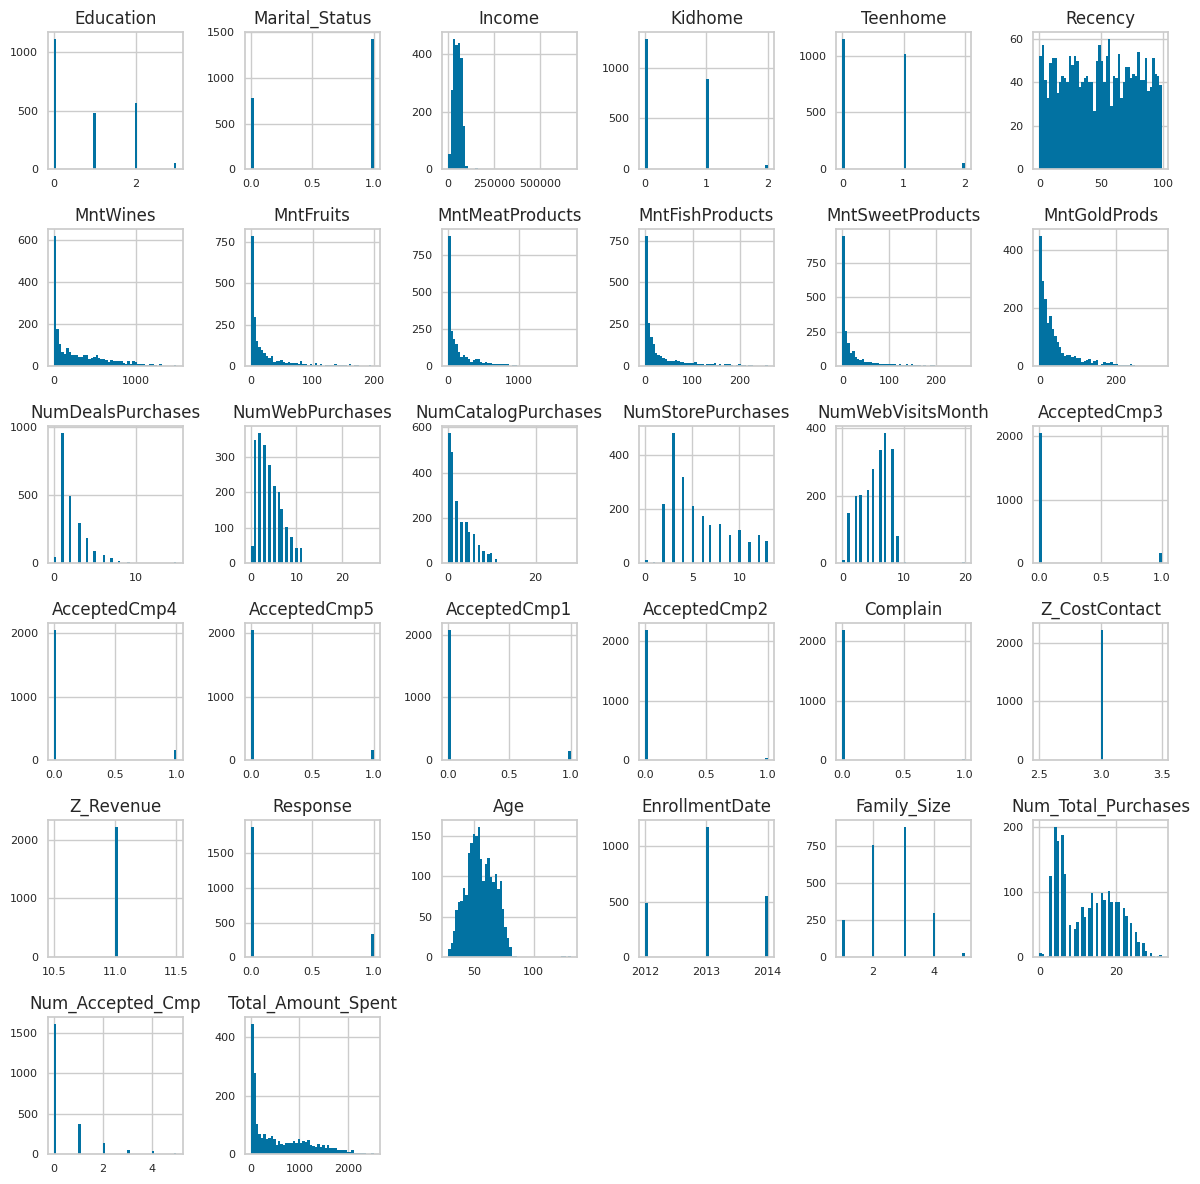

In [19]:
num_cols = [var for var in df_cust.columns if df_cust[var].dtype != 'O']

df_cust[num_cols].hist(figsize=(12, 12), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

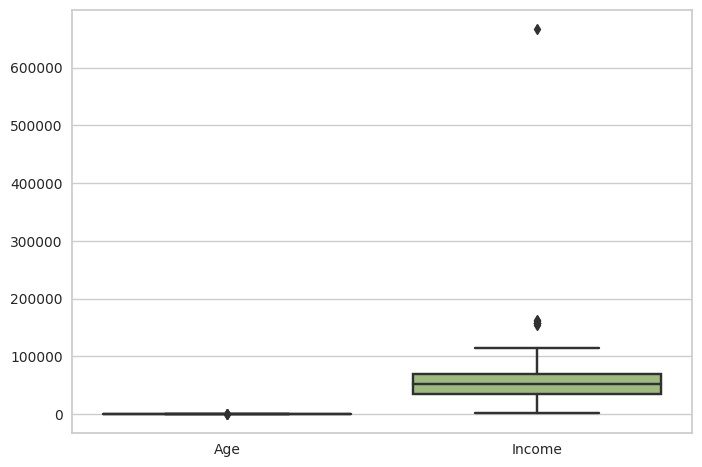

In [20]:
sns.boxplot(df_cust[['Age', 'Income']])
plt.show()

From the observations I've seen, the Age and Income features tend to have very extreme Outliers values ​​compared to other features. Therefore, I will trim outliers on these two features

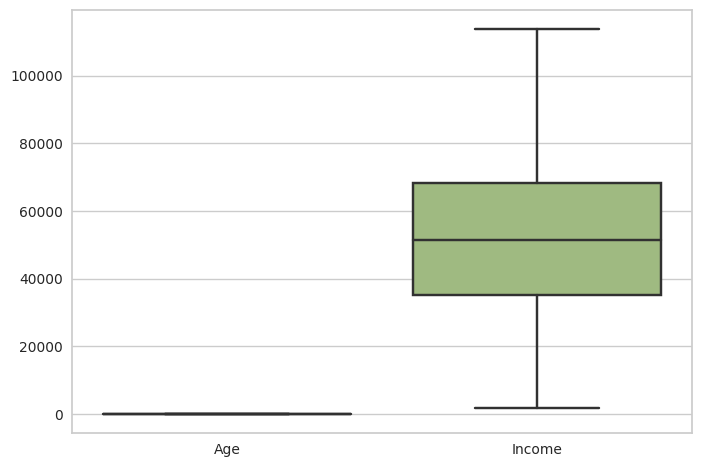

In [21]:
# removing ourliers on 'Age' & 'Income'
remove_outlier = OutlierTrimmer(
    capping_method='iqr',
    tail='right',
    variables=['Age', 'Income']
)

df_cust = remove_outlier.fit_transform(df_cust)
sns.boxplot(df_cust[['Age', 'Income']])
plt.show()

And based on the histogram plot above, I also see several features that do not provide any information at all (`Z_CostContact` & `Z_Revenue`)

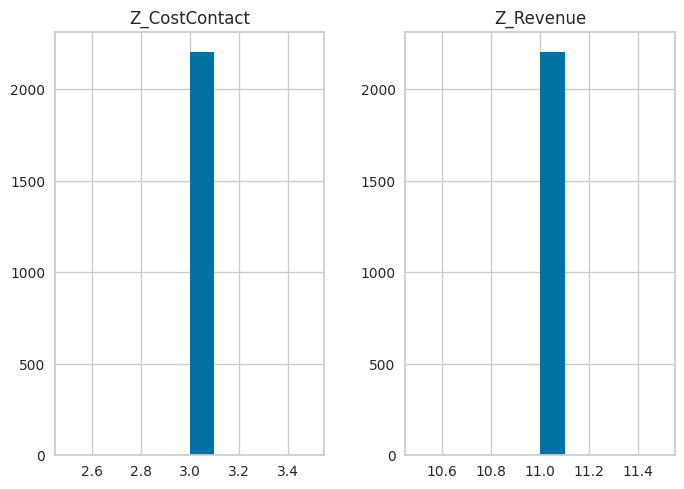

In [22]:
df_cust[['Z_CostContact', 'Z_Revenue']].hist()
plt.show()

We will need to drop `Z_CostContact` & `Z_Revenue` columns because it doesnt give us any informations

In [23]:
df_cust.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

## Feature Scaling:
- Apply Normalization on normalized distributed data
- Apply Standardization on skewed data

In [24]:
normal_data = ['Income', 'Recency', 'Age', 'Family_Size',
                'EnrollmentDate']
skewed_data = ['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                  'Num_Total_Purchases', 'Num_Accepted_Cmp', 'Total_Amount_Spent']

# copying original df to new df for scaling
df_cust_scaled = df_cust.copy()

# min max scaling
min_max_scaler = MinMaxScaler()
df_cust_scaled[normal_data] = min_max_scaler.fit_transform(df_cust[normal_data])

# standard scaling
ss_scaler = StandardScaler()
df_cust_scaled[skewed_data] = ss_scaler.fit_transform(df_cust[skewed_data])

Let's take a look on the distribution after scaling our features

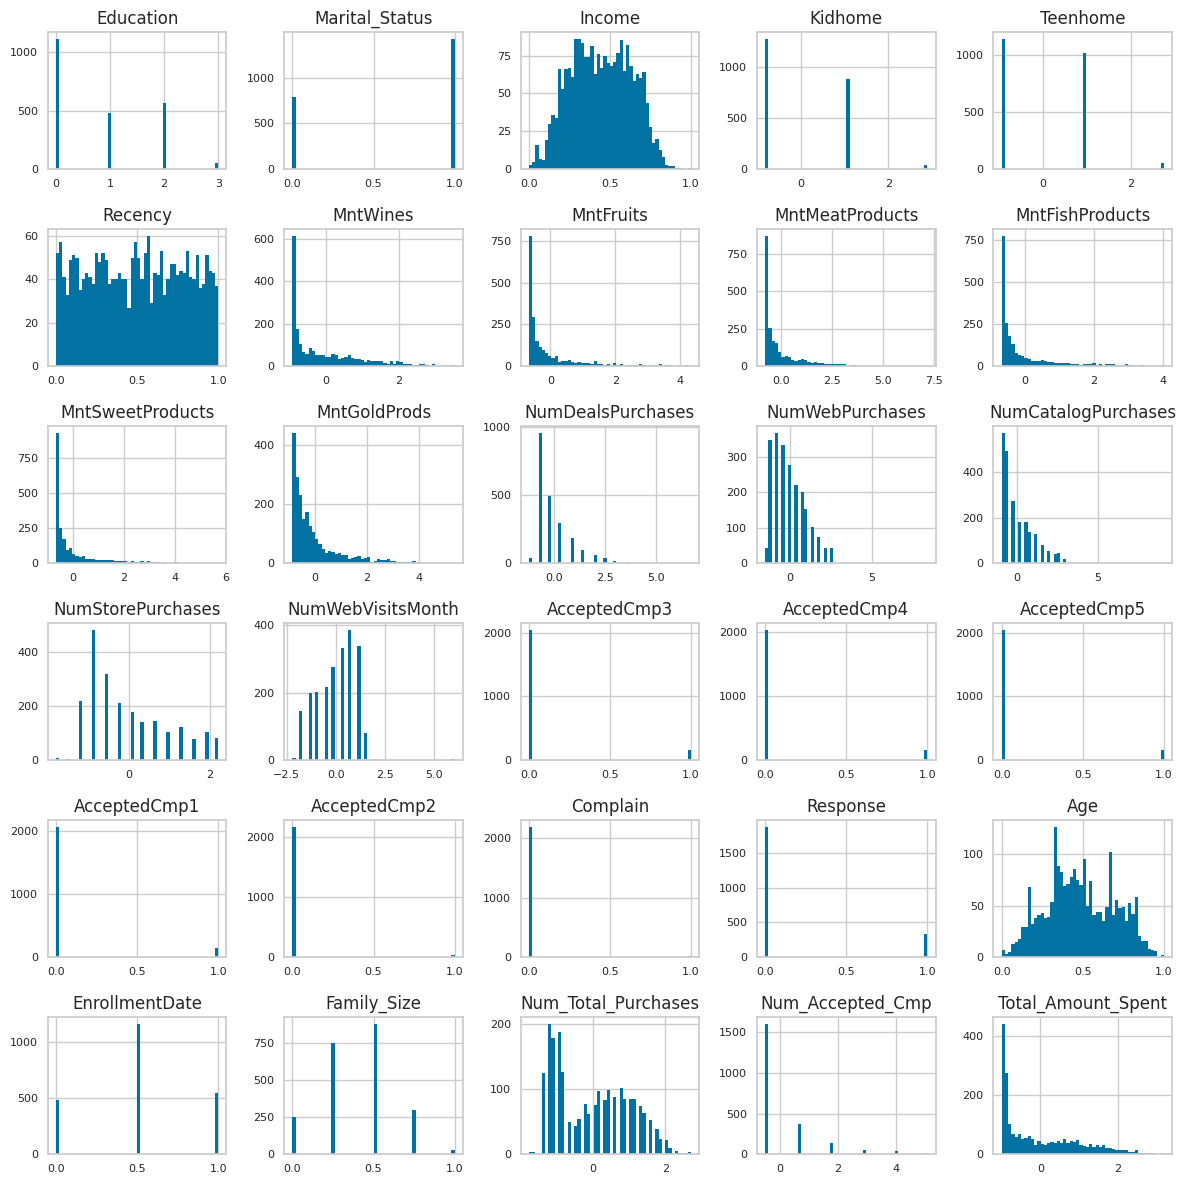

In [25]:
num_cols = [var for var in df_cust_scaled.columns if df_cust_scaled[var].dtype != 'O']

df_cust_scaled[num_cols].hist(figsize=(12, 12), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

Now our dataset is ready to implement clustering & PCA

## Applying PCA for Dimensionality Reduction

In [26]:
# reduce dimentionality into 3 components
pca = PCA(n_components=3)
pca.fit(df_cust_scaled)

pca_df = pd.DataFrame(pca.transform(df_cust_scaled), columns=['PC1', 'PC2', 'PC3'])
pca_df.head()

,PC1,PC2,PC3
0,4.602137,-0.195249,0.476010
1,-2.922977,-0.406031,-0.424635
2,1.866104,-0.144696,-0.950347
3,-2.615311,-0.914071,-0.065853
4,-0.404521,0.308612,-0.404921


Let's visualize our data after applying PCA

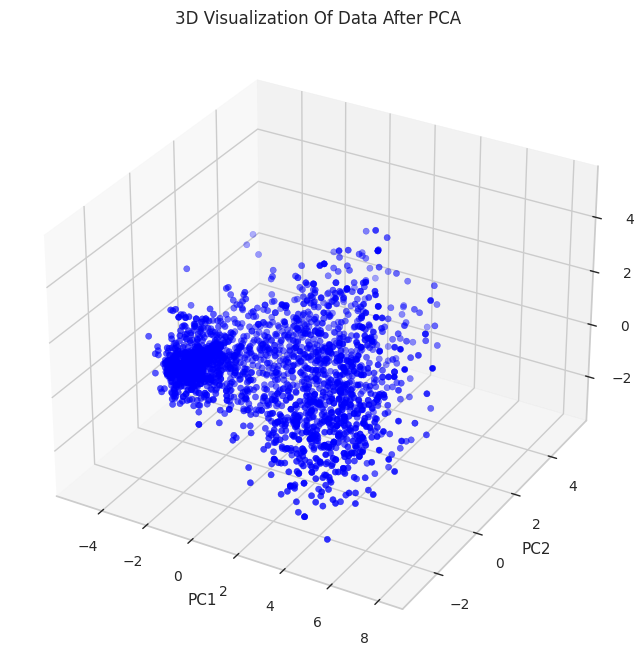

In [27]:
x, y, z = pca_df['PC1'], pca_df['PC2'], pca_df['PC3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("3D Visualization Of Data After PCA")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

For 3D Interactive visualization

In [28]:
# 3D interactive scatter plot
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    title='3D Visualization Of Data After PCA'
)

fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()

For Clustering, we'll be using `KMeans Clustering`.

## KMeans Clustering

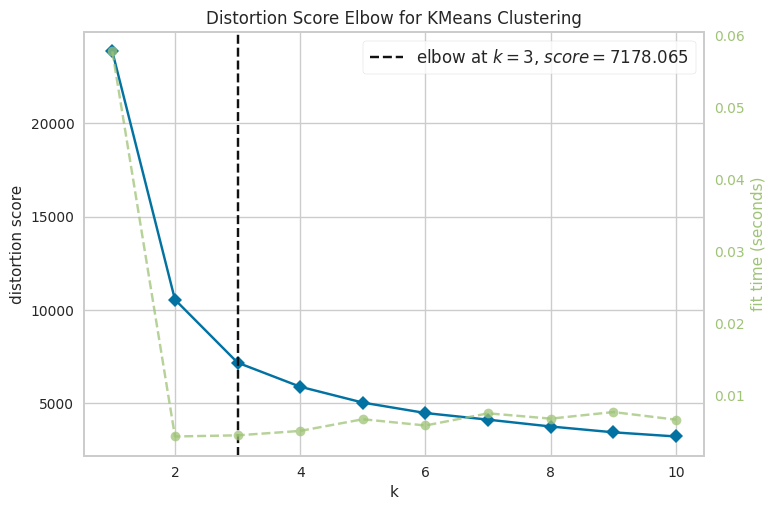

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,11))
visualizer.fit(pca_df)
visualizer.show()

From the plot above, the optimal cluster for KMeans is 3, lets apply the clusters to our KMeans

In [30]:
kmeans = KMeans(n_clusters=3, random_state=0)

y_kmeans = kmeans.fit_predict(pca_df)

# add cluster to original dataframe
df_cust['Cluster_KMeans'] = y_kmeans

Visualizing the PCA after clustering

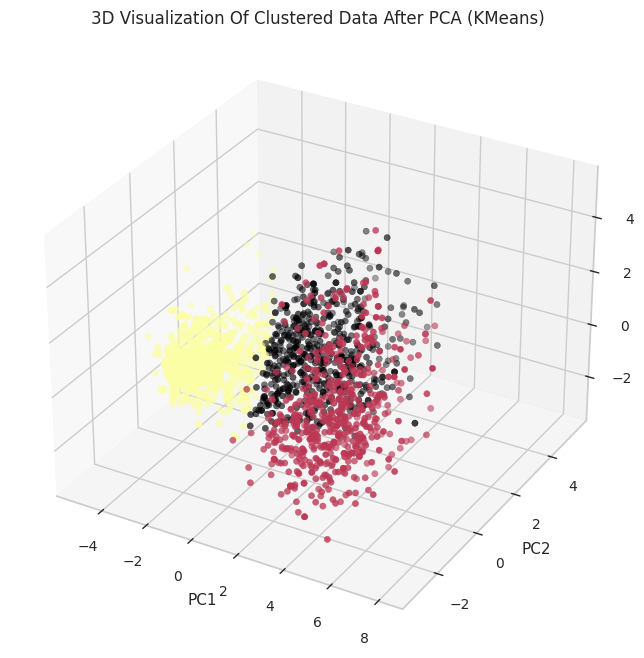

In [31]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=y_kmeans, marker="o", cmap='inferno', )
ax.set_title("3D Visualization Of Clustered Data After PCA (KMeans)")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

For 3D Interactive visualization

In [32]:
# 3D interactive scatter plot
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color=y_kmeans,
    title='3D Visualization Of Clustered Data After PCA (KMeans)',
)

fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()

## Evaluating our Clusters

In [33]:
palette_kmeans = ['#679436', '#eb5e28', '#4361ee']

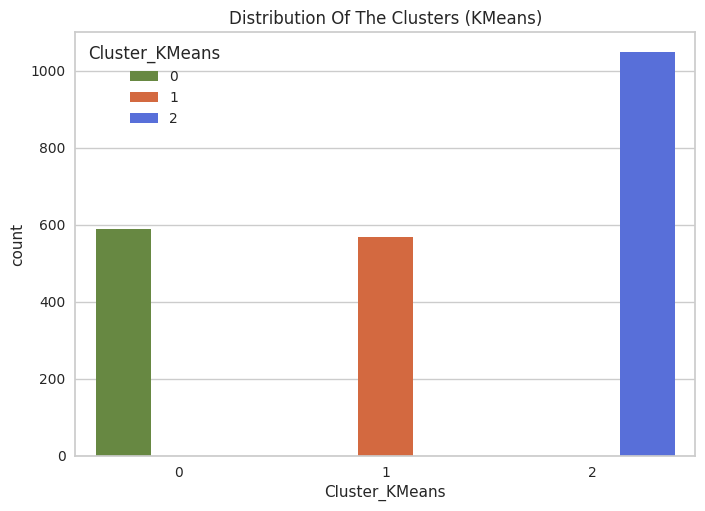

In [34]:
sns.countplot(x=df_cust["Cluster_KMeans"], hue=df_cust["Cluster_KMeans"], palette=palette_kmeans)
plt.title("Distribution Of The Clusters (KMeans)")
plt.show()

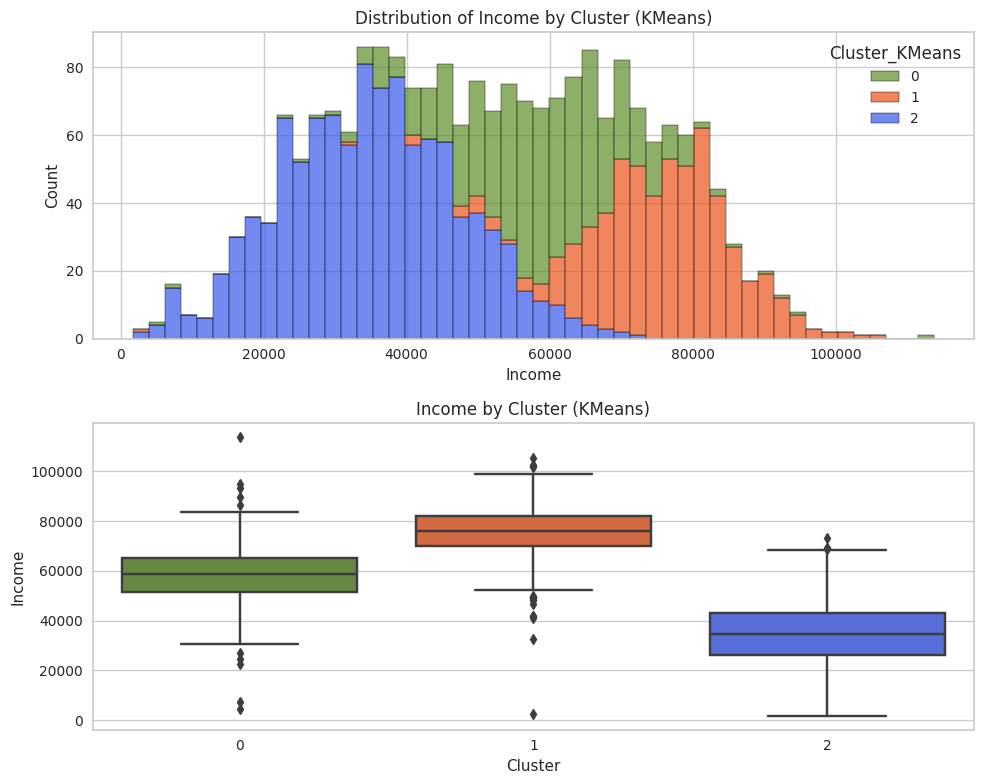

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(data=df_cust, x='Income', hue='Cluster_KMeans', palette=palette_kmeans, bins=50, multiple='stack', ax=ax[0])
ax[0].set_title('Distribution of Income by Cluster (KMeans)')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Count')

sns.boxplot(data=df_cust, x='Cluster_KMeans', y='Income', palette=palette_kmeans, ax=ax[1])
ax[1].set_title('Income by Cluster (KMeans)')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Income')

plt.tight_layout()
plt.show()

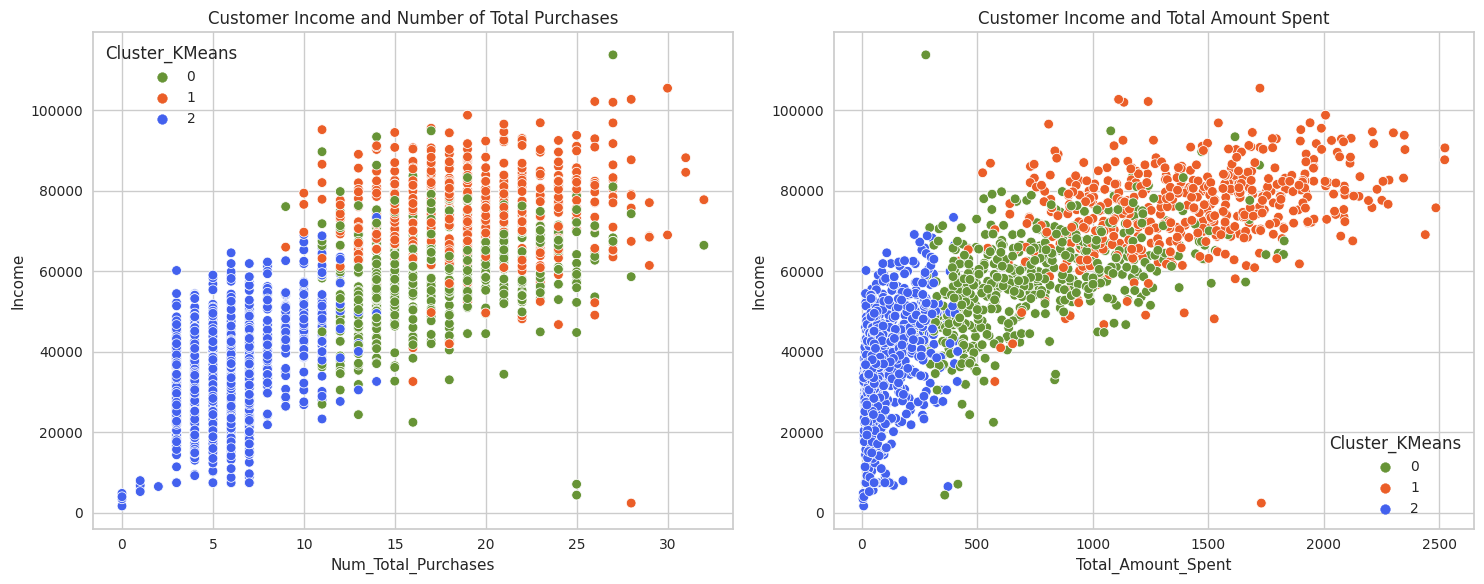

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Income vs Num_Total_Purchases
sns.scatterplot(x='Num_Total_Purchases', y='Income', data=df_cust, hue='Cluster_KMeans', palette=palette_kmeans, ax=axes[0])
axes[0].set_title('Customer Income and Number of Total Purchases')
axes[0].set_xlabel('Num_Total_Purchases')
axes[0].set_ylabel('Income')

# Income vs Total_Amount_Spent
sns.scatterplot(x='Total_Amount_Spent', y='Income', data=df_cust, hue='Cluster_KMeans', palette=palette_kmeans, ax=axes[1])
axes[1].set_title('Customer Income and Total Amount Spent')
axes[1].set_xlabel('Total_Amount_Spent')
axes[1].set_ylabel('Income')

plt.tight_layout()
plt.show()

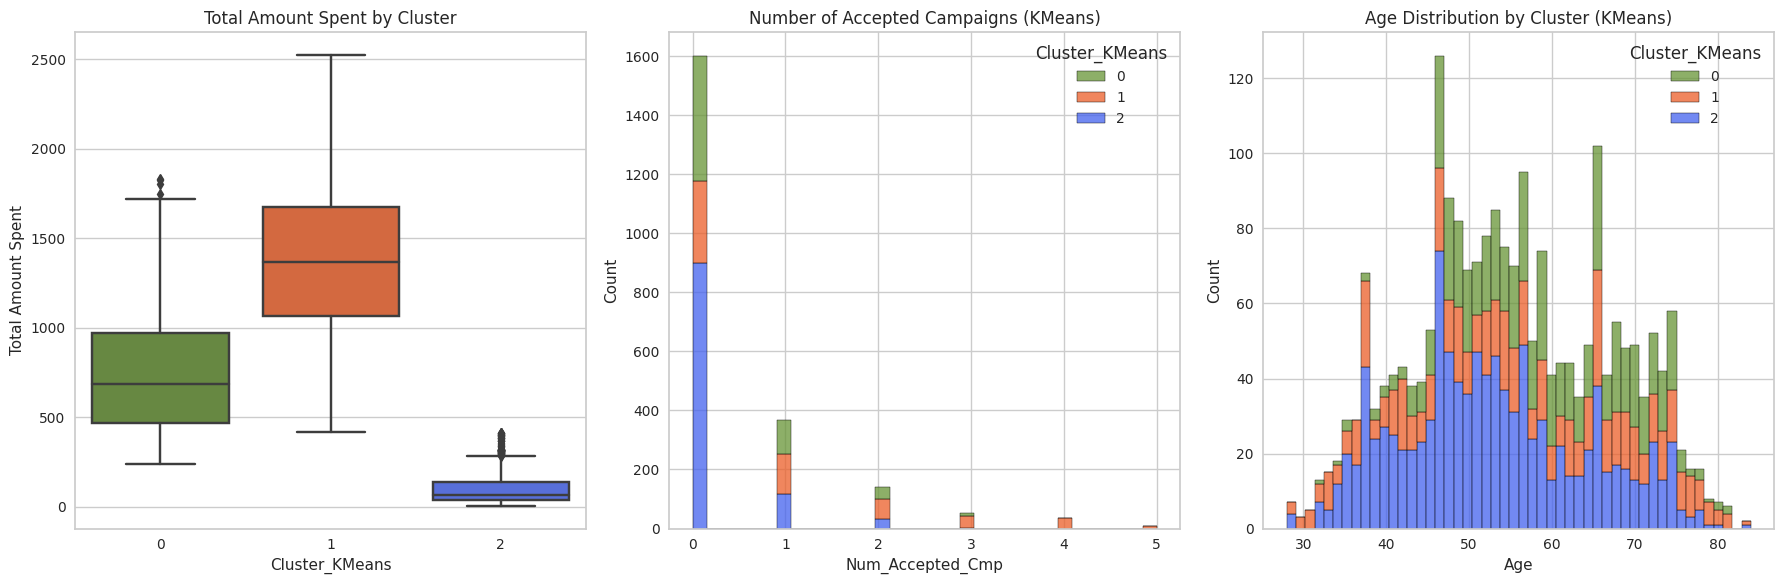

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# boxplot for Total Amount Spent by Cluster
sns.boxplot(data=df_cust, x='Cluster_KMeans', y='Total_Amount_Spent', palette=palette_kmeans, ax=ax[0])
ax[0].set_title('Total Amount Spent by Cluster')
ax[0].set_xlabel('Cluster_KMeans')
ax[0].set_ylabel('Total Amount Spent')

# histogram for Number of Accepted Campaigns
sns.histplot(data=df_cust, x="Num_Accepted_Cmp", hue="Cluster_KMeans", multiple="stack", palette=palette_kmeans, ax=ax[1])
ax[1].set_title('Number of Accepted Campaigns (KMeans)')
ax[1].set_xlabel('Num_Accepted_Cmp')
ax[1].set_ylabel('Count')

# histogram for Age Distribution by Cluster
sns.histplot(data=df_cust, x='Age', hue='Cluster_KMeans', palette=palette_kmeans, bins=50, multiple='stack', ax=ax[2])
ax[2].set_title('Age Distribution by Cluster (KMeans)')
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Insights Conclusion

1. **Cluster 0 (Green)**
    - **Income Distribution:** Primarily between `$40,000` and `$70,000`. The income is relatively well-distributed with a few outliers on both the higher and lower ends.
    - **Spending Behavior:** Moderate spender, with most spending between `$500` and `$1,000`. There is a reasonable number of accepted campaigns, indicating moderate engagement with promotional offers.
    - **Age Distribution:** The age distribution peaks around 50 years, indicating that this cluster likely consists of middle-aged individuals.

2. **Cluster 1 (Orange)**
    - **Income Distribution:** High-income individuals with most having incomes above `$70,000`.
    - **Spending Behavior:** Highest spenders, with amounts ranging between `$1,000` and `$2,000`. They show significant engagement in marketing campaigns, likely because they have higher disposable incomes.
    - **Age Distribution:** The age distribution is spread out, with a peak around 40-50 years, suggesting that this cluster contains relatively younger but financially successful individuals.

3. **Cluster 2 (Blue)**
    - **Income Distribution:** This cluster consists of low-income individuals, predominantly earning between `$0` and `$40,000`.
    - **Spending Behavior:** These individuals spend the least, with the majority spending under `$500`.
    - **Age Distribution:** The age distribution shows a broad spread but with a significant portion of younger individuals, possibly under 40 years of age.


## Please Upvote if you found this notebook helpful! Thank You!!!